## подключение датасета и добавление всего в папу s

In [78]:
!pip install kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
!kaggle datasets download kasikrit/att-database-of-faces
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download kasikrit/att-database-of-faces
! unzip att-database-of-faces.zip -d /content/s

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/kasikrit/att-database-of-faces
License(s): unknown
att-database-of-faces.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/kasikrit/att-database-of-faces
License(s): unknown
att-database-of-faces.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  att-database-of-faces.zip
replace /content/s/README? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

берем пути ко всем файлам в датасете

In [79]:
import os
def get_routes(path):
  pathes = []
  flag = True
  for el in os.walk(path):
    if flag:
      flag = False
    else:
      for d_el in el[2]:
        pathes.append(el[0] + "/" + d_el)
  return pathes

In [80]:
routes = get_routes("/content/s/")


делаем словари по людям

In [81]:
def make_dicts(arr):
  authors = dict()
  for el in arr:
    if authors.get(el.split('/')[3]) == None:
      authors[el.split('/')[3]] = [el]
    else:
      authors[el.split('/')[3]].append(el)
  return authors

In [82]:
dicts = make_dicts(routes)


In [ ]:
dicts

In [83]:
import random

In [84]:
test_arr = list()
for el in dicts:
  for i in range(2):
    fl = random.randint(1, 10)
    path = "/content/s/" + el + "/" + str(fl) + ".pgm"
    while not(path in dicts[el]):
      fl = random.randint(1, 10)
      path = "/content/s/" + el + "/" + str(fl) + ".pgm"
    test_arr.append(path)
    dicts[el].remove(path)
test_dict = make_dicts(test_arr)



In [ ]:
test_dict

In [86]:
from PIL import Image

s1 - 1
s2 - 2
s3 - 9
s4 - 1
s5 - 2
s6 - 10
s7 - 8
s8 - 2
s9 - 9
s10 - 10
s11 - 6
s12 - 1
s13 - 5

делаем пары рандомом

In [88]:
def make_triples(dicts):
  #перебор всех папок
  triples = list()
  for d in dicts:
    #перебор всех элементов
    for i in range(0, len(dicts[d])):

      #для каждой картинки образуем пару с остальными картинками
      for j in range(i+1, len(dicts[d])):

        for k in range(25):
          dict_n = random.randint(1, 40)
          dict_ns = 's' + str(dict_n)
          while dicts.get(dict_ns) == None or d == dict_ns:
            dict_n = random.randint(1, 40)
            dict_ns = 's' + str(dict_n)
          photo_n = random.randint(0, len(dicts[dict_ns]) - 1)
          while [dicts[d][i], dicts[d][j], dicts[dict_ns][photo_n]] in triples:
            photo_n = random.randint(0, len(dicts[dict_ns]) - 1)
          triples.append([dicts[d][i], dicts[d][j], dicts[dict_ns][photo_n]])


  return triples


In [89]:
triples = make_triples(dicts)

In [90]:
print(len(triples))

28000


In [91]:
for el in triples:
  if not(el[0].split('/')[3] == el[1].split('/')[3] and el[0].split('/')[3] != el[2].split('/')[3]):
    print("yep")

700.0

разбиваем на train и test dataset

In [92]:
def make_test(train_d, test_d):
  test = dict()
  for el in test_d:
    for i in range(2):
      for j in range(8):

        photo_n = random.randint(0, len(train_d[el]) - 1)
        while test.get((train_d[el][photo_n], test_d[el][i])) != None:
          photo_n = random.randint(0, len(train_d[el]) - 1)
        test[(train_d[el][photo_n], test_d[el][i])] = 1



        dict_n = random.randint(1, 40)
        dict_ns = 's' + str(dict_n)
        while train_d.get(dict_ns) == None or el == dict_ns:
          dict_n = random.randint(1, 40)
          dict_ns = 's' + str(dict_n)
        photo_n = random.randint(0, len(train_d[dict_ns]) - 1)
        while test.get((train_d[dict_ns][photo_n], test_d[el][i])) != None:
          photo_n = random.randint(0, len(train_d[dict_ns]) - 1)
        test[(train_d[dict_ns][photo_n], test_d[el][i])] = 0
  return test


In [93]:
test = make_test(dicts, test_dict)

In [94]:
for el in test:
  if (el[0].split('/')[3] == el[1].split('/')[3]) != test[el]:
    print("yep")

In [95]:
len(test)

1280

In [96]:
from torch.utils.data import Dataset, DataLoader

In [97]:
import torch

In [98]:

import torchvision.transforms as transforms

преобразование картинки в тензор

In [99]:
#конвертация картинки в тензор
transform = transforms.Compose([
    transforms.PILToTensor()
])
def get_image(path):
  img = Image.open(path)
  img = transform(img)
  return img



образуем датасет из пар тензоров и 0 или 1

In [100]:

class CustomDataset(Dataset):
    def __init__(self, arr):
        random.shuffle(arr)
        self.data = list()
        for el in arr:
          pict1 = get_image(el[0])
          pict1 = pict1.type(torch.float32)
          pict2 = get_image(el[1])
          pict2 = pict2.type(torch.float32)
          pict3 = get_image(el[2])
          pict3 = pict3.type(torch.float32)
          self.data.append([pict1, pict2, pict3])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [101]:

class CustomDatasetTest(Dataset):
    def __init__(self, data_dict):
        arr = list(data_dict.items())
        random.shuffle(arr)
        print(arr)
        self.data = list()
        for el in arr:
          pict1 = get_image(el[0][0])
          pict1 = pict1.type(torch.float32)
          pict2 = get_image(el[0][1])
          pict2 = pict2.type(torch.float32)
          label = torch.tensor(el[1])
          self.data.append([[pict1, pict2], label])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        key, value = self.data[idx]
        return key, value

In [102]:
data_s = CustomDataset(triples)
b_s = 32
data_l = DataLoader(data_s, batch_size=b_s, shuffle=True, num_workers=2)



In [103]:

data_s_test = CustomDatasetTest(test)
data_l_test = DataLoader(data_s_test, batch_size=1, shuffle=True)

[(('/content/s/s15/4.pgm', '/content/s/s15/7.pgm'), 1), (('/content/s/s12/10.pgm', '/content/s/s12/4.pgm'), 1), (('/content/s/s39/9.pgm', '/content/s/s39/2.pgm'), 1), (('/content/s/s5/6.pgm', '/content/s/s23/9.pgm'), 0), (('/content/s/s15/9.pgm', '/content/s/s20/8.pgm'), 0), (('/content/s/s23/5.pgm', '/content/s/s39/2.pgm'), 0), (('/content/s/s6/8.pgm', '/content/s/s6/9.pgm'), 1), (('/content/s/s29/9.pgm', '/content/s/s7/3.pgm'), 0), (('/content/s/s28/5.pgm', '/content/s/s28/6.pgm'), 1), (('/content/s/s24/3.pgm', '/content/s/s6/1.pgm'), 0), (('/content/s/s38/9.pgm', '/content/s/s38/8.pgm'), 1), (('/content/s/s30/9.pgm', '/content/s/s30/8.pgm'), 1), (('/content/s/s20/2.pgm', '/content/s/s20/8.pgm'), 1), (('/content/s/s37/8.pgm', '/content/s/s20/8.pgm'), 0), (('/content/s/s39/9.pgm', '/content/s/s21/7.pgm'), 0), (('/content/s/s8/6.pgm', '/content/s/s8/1.pgm'), 1), (('/content/s/s17/1.pgm', '/content/s/s16/5.pgm'), 0), (('/content/s/s2/7.pgm', '/content/s/s2/8.pgm'), 1), (('/content/s/s3/

In [104]:
len(data_l)

875

не используемая функция потерь

In [105]:
import torch.nn as nn
import torch.nn.functional as F

архитектура модели

In [106]:
class TripletLoss(nn.Module):
    def __init__(self, margin=1):
        super(TripletLoss, self).__init__()
        self.margin = margin

    def forward(self, anchor, positive, negative):
        pos_dist = nn.functional.pairwise_distance(anchor, positive)
        neg_dist = nn.functional.pairwise_distance(anchor, negative)
        loss = torch.clamp(pos_dist - neg_dist + self.margin, min=0.0)
        return loss.mean()

In [108]:
class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()
        self.cnn1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.2),

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.2),

            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.2)
        )

        self.fc1 = nn.Sequential(
            nn.Linear(512 * 3 * 2, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(256, 128)
        )

    def forward(self, x):
        output = self.cnn1(x)
        output = output.view(output.size(0), -1)
        output = self.fc1(output)
        return output



обучение модели

In [109]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(device)

cuda:0


In [114]:
if device == "cpu":
  net = SiameseNetwork()
else:
  net = SiameseNetwork().cuda()
prob = 0.5
margin_ = 1
criterion = TripletLoss(margin=margin_)


optimizer = torch.optim.Adam(net.parameters(),  lr=0.0001)
history_train = []
history_test = []

провепкаа на возможность использовать gpu

cuda:0


In [115]:
epochs = 5
pdist = torch.nn.PairwiseDistance(p=2)
for epoch in range(epochs):
  net.train()
  correct_train = 0

  for i, data in enumerate(data_l, 0):
    #прогоняем через модель тензоры
    if device == "cpu":
      dat1 = data[0]
      dat2 = data[1]
      dat3 = data[2]
    else:
      dat1 = data[0].cuda()
      dat2 = data[1].cuda()
      dat3 = data[2].cuda()
    out1 = net(dat1)
    out2 = net(dat2)
    out3 = net(dat3)

    #обновляем модель
    dd1 = []
    dd2 = []
    for j in range(b_s):
      d1 = nn.functional.pairwise_distance(out1[j], out2[j])
      d2 = nn.functional.pairwise_distance(out1[j], out3[j])
      dd1 += [d1.item()]
      dd2 += [d2.item()]
    for j in range(b_s):
      if dd1[j] <= margin_:
        correct_train += 1
      if dd2[j] > margin_:
        correct_train += 1

    loss_contrastive = criterion(out1, out2, out3)
    optimizer.zero_grad()
    loss_contrastive.backward()
    optimizer.step()
    history_train.append(loss_contrastive.item())
    #промежуточные результаты
    if i % 50 == 0:
      print(i, loss_contrastive.item())
      print("pos")
      print(dd1)
      print("neg")
      print(dd2)
      print("___")
      history_train.append(loss_contrastive.item())
  #после прохождения эпоих смотрим результаты на тестовой выборке
  net.eval()

  correct_test = 0
  for i, data in enumerate(data_l_test, 0):
    if device == "cpu":
      dat1 = data[0][0]
      dat2 = data[0][1]
    else:

      dat1 = data[0][0].cuda()
      dat2 = data[0][1].cuda()
    out1 = net(dat1)
    out2 = net(dat2)
    dist = pdist(out1, out2)
    if (dist <= margin_ and data[1] == 1) or (dist > margin_ and data[1] == 0):
      correct_test += 1
  print("train: ",correct_train,  correct_train / (2 * len(data_l) * b_s))
  print("test: ",correct_test, correct_test / len(data_l_test))
  print("end of epoch ", epoch + 1)
  print("_______________________________________")

0 0.9866416454315186
pos
[0.8805095553398132, 0.4581519663333893, 0.43193694949150085, 0.48672375082969666, 0.6557134985923767, 0.6045508980751038, 0.6706584692001343, 0.47774261236190796, 0.7294961214065552, 0.5561996102333069, 0.5983147621154785, 0.5737025737762451, 0.5941156148910522, 0.6246893405914307, 0.3757916986942291, 0.615583062171936, 0.6132452487945557, 0.5757452845573425, 0.5739613771438599, 0.5533889532089233, 0.5344198346138, 0.6707580089569092, 0.5826503038406372, 0.4065532982349396, 0.40274345874786377, 0.5285242795944214, 0.4564000964164734, 0.5717862844467163, 0.7287062406539917, 0.6869575381278992, 0.6150768995285034, 0.674466609954834]
neg
[0.7813345193862915, 0.5161445736885071, 0.4716625511646271, 0.6201862096786499, 0.5812186598777771, 0.5411921739578247, 0.6599901914596558, 0.6468174457550049, 0.6494674682617188, 0.5371536016464233, 0.5647987127304077, 0.6646305918693542, 0.6114577054977417, 0.5018545389175415, 0.47075146436691284, 0.6669480800628662, 0.5100598

сохранение модели

In [ ]:
torch.save(net, 'siamese_network_triplet.pth')

отображение функции потерь

In [116]:
import matplotlib.pyplot as plt
import numpy as np

<function matplotlib.pyplot.show(close=None, block=None)>

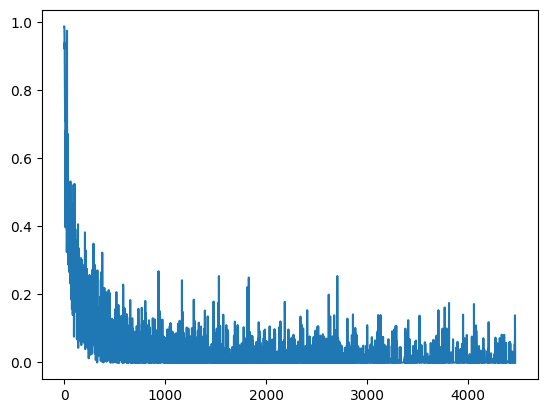

In [117]:
plt.plot(history_train)
plt.show

работа с тестовой выборкой

In [118]:
transform_back = transforms.Compose([
    transforms.ToPILImage()
])


In [120]:
tr = list()
for el in dicts:
  for ell in dicts[el]:
    tr.append(ell)

In [121]:
print(len(tr))

320


In [122]:
print(len(test_arr))

80


tensor([2.8500], device='cuda:0')


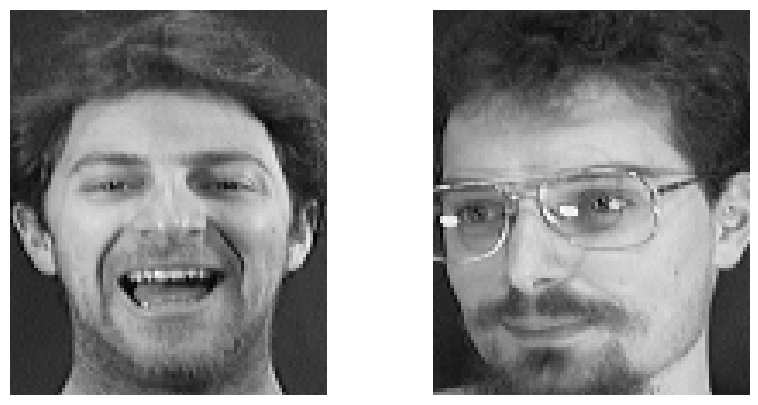

tensor([2.6622], device='cuda:0')


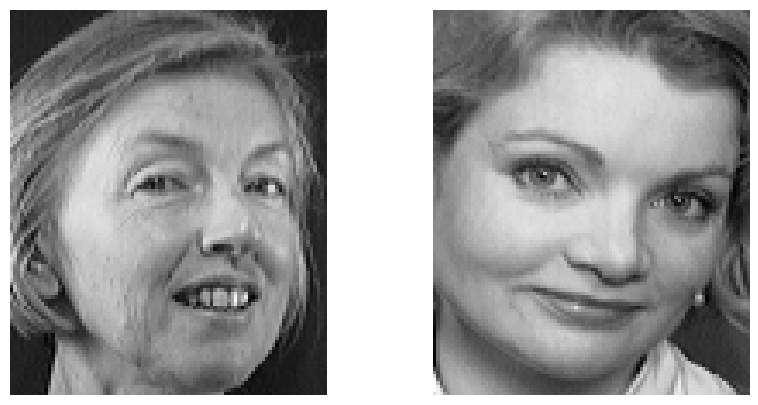

In [125]:
net.eval()
correct = 0
for el in test_arr:
  mn = 100000
  for m_el in tr:

    img1 = Image.open(el)
    img1 = transform(img1)
    img1 = img1.type(torch.float32)
    img1 = img1.unsqueeze(1)
    if device != "cpu":
      img1 = img1.cuda()
    img2 = Image.open(m_el)
    img2 = transform(img2)
    img2 = img2.type(torch.float32)
    img2 = img2.unsqueeze(1)
    if device != "cpu":
      img2 = img2.cuda()
    with torch.no_grad():
      out1 = net(img1)
      out2 = net(img2)
      dist = pdist(out1, out2)
      if dist < mn:
        mn = dist
        p_mn = m_el
  if p_mn.split('/')[3] == el.split('/')[3]:
    correct += 1
  else:
    print(mn)
    pct1 = Image.open(el)
    pct2 = Image.open(p_mn)
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Отображение первого изображения
    axes[0].imshow(pct1, cmap='gray')
    axes[0].axis('off')  # Отключение осей

    # Отображение второго изображения
    axes[1].imshow(pct2, cmap='gray')
    axes[1].axis('off')  # Отключение осей

    # Отображение фигуры
    plt.show()

In [127]:
78 / 80

0.975